<a href="https://colab.research.google.com/github/EricPeter/EricPeter/blob/master/Inception_of_Transfer_learning__demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from numpy.random import seed
seed(1)
import tensorflow as tf

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
from tensorflow.keras import layers
from tensorflow.keras import models

In [0]:
!cp -r /content/drive/My\ Drive/Beans .
# !cp -r /content/drive/My\ Drive/Models .

In [0]:
#importinng the data augementation 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
#performing data augementation to the images creating more data for traing 
traindatagen = ImageDataGenerator(horizontal_flip=True,rotation_range=20,rescale=1/225., validation_split=0.2, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,fill_mode="nearest")

In [0]:
##loading the dataset directory
traindir = "Beans/"

In [0]:
 ##in this part am spliting the dataset into training , setting the target size of the images  , the class mode , naming it and setting the batch size of the dataset
 ##number of training examples utilized in one iteration 
 traingen = traindatagen.flow_from_directory(directory=traindir,
                                target_size=(224,224),
                                batch_size = 12,
                                class_mode='categorical',
                                subset='training')

Found 1040 images belonging to 3 classes.


In [0]:
traingen.class_indices

{'Angular_Leaf_Spot': 0, 'Bean_Rust': 1, 'Healthy': 2}

In [0]:
 ##in this part am spliting the dataset into training , setting the target size of the images  , the class mode , naming it and setting the batch size of the dataset
 ##number of validation examples utilized in one iteration 
validationgen = traindatagen.flow_from_directory(
                                directory=traindir,
                                target_size=(224,224),
                                batch_size = 12,
                                class_mode='categorical',
                                subset='validation')

Found 259 images belonging to 3 classes.


In [0]:
traingen.class_mode

'categorical'

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D,GlobalAveragePooling2D,Input

In [0]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.applications import *

In [0]:
# create the base pre-trained model
#download the inception weights for which to train on
base_model = InceptionV3(weights='imagenet', include_top=False)
input_tensor=Input(shape=(224, 224, 3),name="Mul")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
87916544/87910968 [==============================] - 3s 0us/step


In [0]:
for l in (base_model.layers):
  print(l.name, l.trainable)
  l.trainable = False


input_1 True
conv2d True
batch_normalization True
activation True
conv2d_1 True
batch_normalization_1 True
activation_1 True
conv2d_2 True
batch_normalization_2 True
activation_2 True
max_pooling2d True
conv2d_3 True
batch_normalization_3 True
activation_3 True
conv2d_4 True
batch_normalization_4 True
activation_4 True
max_pooling2d_1 True
conv2d_8 True
batch_normalization_8 True
activation_8 True
conv2d_6 True
conv2d_9 True
batch_normalization_6 True
batch_normalization_9 True
activation_6 True
activation_9 True
average_pooling2d True
conv2d_5 True
conv2d_7 True
conv2d_10 True
conv2d_11 True
batch_normalization_5 True
batch_normalization_7 True
batch_normalization_10 True
batch_normalization_11 True
activation_5 True
activation_7 True
activation_10 True
activation_11 True
mixed0 True
conv2d_15 True
batch_normalization_15 True
activation_15 True
conv2d_13 True
conv2d_16 True
batch_normalization_13 True
batch_normalization_16 True
activation_13 True
activation_16 True
average_pooling2d_

In [0]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [0]:
base_model.input

<tf.Tensor 'input_1:0' shape=(?, ?, ?, 3) dtype=float32>

In [0]:
# add a global spatial average pooling layer
from tensorflow.keras.constraints import max_norm

x = base_model(input_tensor)
#global average pooling (GAP) layers to minimize overfitting by reducing the total number of 
#parameters in the model. Similar to max pooling layers, GAP layers are used to reduce the spatial dimensions of a three-dimensional tensor
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
#dense layer apply non-linearlty on the input array values of the image 
#converting negative values to zeros
x = Dense(512, activation='relu')(x)
###dropout layer to prevent overfitting 
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
# and a logistic layer -- let's say we have 3 classes
predictions = Dense(3, activation='softmax')(x)

In [0]:
# model = models.Model(inputs=base_model.input, outputs=predictions)
# this is the model we will train
model = Model(inputs=input_tensor, outputs=predictions,name="final_result")

In [0]:
# model.summary()
print(model.input.op.name)
print(model.output.op.name)

Mul
dense_2/Softmax


In [0]:
#TensorFlow session
sess = tf.Session()
sess.run(tf.global_variables_initializer())
#initialising variables
init = tf.global_variables_initializer()
sess.run(init)
#tensorboard for better visualisation
writer =tf.summary.FileWriter('tensorboard/', sess.graph)

In [0]:
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import RMSprop
import keras
# es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

Using TensorFlow backend.


In [0]:
'''Optimizers update the weight parameters to
   minimize the loss function. Loss function acts as 
  guides to the terrain telling optimizer if it is 
  moving in the right direction to reach the bottom of the valley, the global minimum
  '''
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])

In [0]:
# Train model
history = model.fit_generator(
                    traingen,
                    epochs=30,# is a measure of the number of times all of the training vectors are used once to update the weights. 
                    validation_data=validationgen,
                    verbose=1)

Epoch 1/30
87/87 [==============================] - 79s 907ms/step - loss: 0.7714 - acc: 0.6288 - val_loss: 0.5860 - val_acc: 0.8147
Epoch 2/30
87/87 [==============================] - 51s 591ms/step - loss: 0.4284 - acc: 0.8346 - val_loss: 0.4973 - val_acc: 0.8533
Epoch 3/30
87/87 [==============================] - 51s 587ms/step - loss: 0.3083 - acc: 0.8923 - val_loss: 0.3685 - val_acc: 0.9112
Epoch 4/30
87/87 [==============================] - 51s 592ms/step - loss: 0.2309 - acc: 0.9212 - val_loss: 0.3498 - val_acc: 0.9073
Epoch 5/30
87/87 [==============================] - 51s 592ms/step - loss: 0.1754 - acc: 0.9452 - val_loss: 0.2811 - val_acc: 0.9614
Epoch 6/30
87/87 [==============================] - 51s 591ms/step - loss: 0.1964 - acc: 0.9375 - val_loss: 0.2225 - val_acc: 0.9421
Epoch 7/30
87/87 [==============================] - 51s 585ms/step - loss: 0.1462 - acc: 0.9577 - val_loss: 0.5924 - val_acc: 0.8880
Epoch 8/30
87/87 [==============================] - 51s 588ms/step - 

In [0]:
model.save('/content/Final/Original.h5')

In [0]:
converter=tf.lite.TFLiteConverter.from_keras_model_file('/content/Final/Original.h5')
tflite_model = converter.convert()
open ("/content/Final/inception.tflite" , "wb") .write(tflite_model)

INFO:tensorflow:Froze 382 variables.
INFO:tensorflow:Converted 382 variables to const ops.


92367040

In [0]:
converter.optimizations =[tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()
open("/content/Final/inception_quant.tflite","wb").write(tflite_quant_model)

23180992

In [0]:
saver = tf.train.Saver()
model_directory='model_files/'

In [0]:
# Freeze the graph
MODEL_NAME = 'inception'
input_graph_path = 'model_files/savegraph.pbtxt'
checkpoint_path = 'model_files/model.ckpt'
input_saver_def_path = ""
input_binary = False
output_node_names = "final_result"
restore_op_name = "save/restore_all"
filename_tensor_name = "save/Const:0"
output_frozen_graph_name = 'model_files/frozen_model_'+MODEL_NAME+'.pb'
output_optimized_graph_name = 'model_files/optimized_inference_model_'+MODEL_NAME+'.pb'
clear_devices = True

In [0]:
#Freezing the graph and generating protobuf files
freeze_graph.freeze_graph(input_graph_path, input_saver_def_path,
                          input_binary, checkpoint_path, output_node_names,
                          restore_op_name, filename_tensor_name,
                          output_frozen_graph_name, clear_devices, "")

In [0]:

#Optimising model for inference only purpose
output_graph_def = optimize_for_inference_lib.optimize_for_inference(
        sess.graph_def,
        ["Mul"], # an array of the input node(s)
        ["final_result"], # an array of output nodes
        tf.float32.as_datatype_enum)

In [0]:
with tf.gfile.GFile(output_optimized_graph_name, "wb") as f:
            f.write(output_graph_def.SerializeToString())
sess.close()

In [0]:
# import math
# import matplotlib
# import matplotlib.pyplot as plt
# import matplotlib.axes as axes
# import numpy as np
# import os
# import pandas as pd
# import seaborn as sns
# import tempfile
# import tensorboard
# import tensorflow as tf
# import timeit
# import zipfile

# from IPython.core.pylabtools import figsize
# from numpy import linalg as LA
# from tensorflow.keras.models import load_model
# from tensorflow_model_optimization.sparsity import keras as sparsity

# # tf.enable_eager_execution()
# plt.style.use('fivethirtyeight')
# sns.set_context('notebook')
# pd.set_option('display.max_rows', 30)
# np.random.seed(1337)
# %config InlineBackend.figure_format = 'retina'
# %load_ext tensorboard

In [0]:
logdir = tempfile.mkdtemp()
print('Writing training logs to ' + logdir)

Writing training logs to /tmp/tmps29i0lgf


In [0]:
%tensorboard --logdir={logdir}

UsageError: Line magic function `%tensorboard` not found.


In [0]:
validation_steps =100
 
loss0,accuracy0 = model.evaluate(validationgen, steps = validation_steps)
 
print("loss: {:.2f}".format(loss0))
print("accuracy: {:.2f}".format(accuracy0))

100/100 [==============================] - 52s 517ms/step - loss: 0.4904 - acc: 0.9619
loss: 0.49
accuracy: 0.96


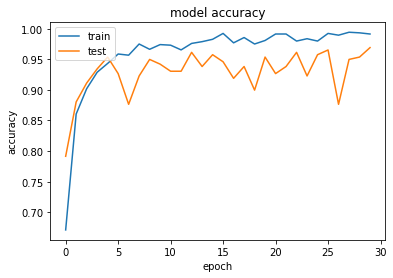

In [0]:
# Learning curves
# Let’s take a look at the learning curves of the training and validation accuracy/loss when using the inception base model.
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

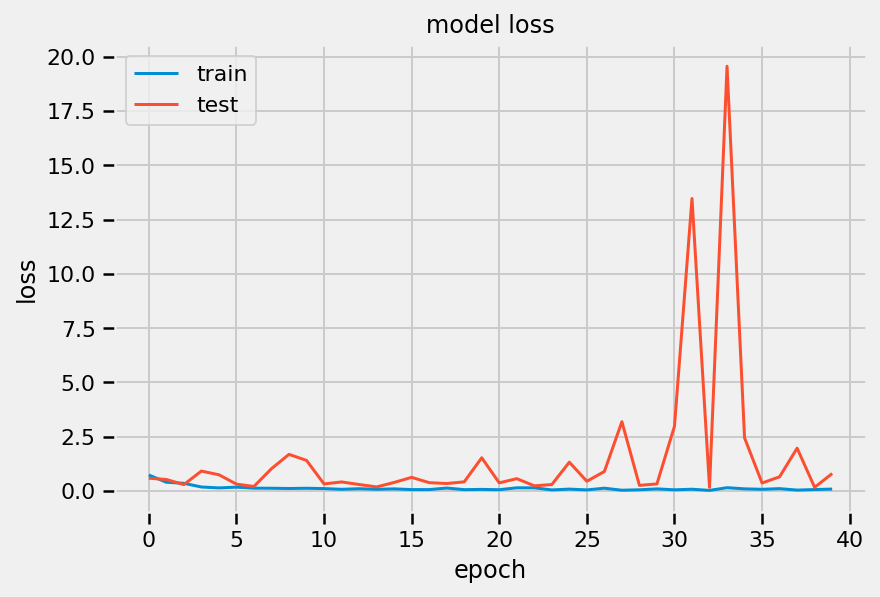

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from tensorflow.keras.models import load_model

In [0]:
inception = load_model('/content/Models/Original.h5')

In [0]:
def weight_prune_dense_layer(k_weights, b_weights, k_sparsity):
    """
    Takes in matrices of kernel and bias weights (for a dense
      layer) and returns the unit-pruned versions of each
    Args:
      k_weights: 2D matrix of the 
      b_weights: 1D matrix of the biases of a dense layer
      k_sparsity: percentage of weights to set to 0
    Returns:
      kernel_weights: sparse matrix with same shape as the original
        kernel weight matrix
      bias_weights: sparse array with same shape as the original
        bias array
    """
    # Copy the kernel weights and get ranked indeces of the abs
    kernel_weights = np.copy(k_weights)
    ind = np.unravel_index(
        np.argsort(
            np.abs(kernel_weights),
            axis=None),
        kernel_weights.shape)
        
    # Number of indexes to set to 0
    cutoff = int(len(ind[0])*k_sparsity)
    # The indexes in the 2D kernel weight matrix to set to 0
    sparse_cutoff_inds = (ind[0][0:cutoff], ind[1][0:cutoff])
    kernel_weights[sparse_cutoff_inds] = 0.
        
    # Copy the bias weights and get ranked indeces of the abs
    bias_weights = np.copy(b_weights)
    ind = np.unravel_index(
        np.argsort(
            np.abs(bias_weights), 
            axis=None), 
        bias_weights.shape)
        
    # Number of indexes to set to 0
    cutoff = int(len(ind[0])*k_sparsity)
    # The indexes in the 1D bias weight matrix to set to 0
    sparse_cutoff_inds = (ind[0][0:cutoff])
    bias_weights[sparse_cutoff_inds] = 0.
    
    return kernel_weights, bias_weights

In [0]:
def unit_prune_dense_layer(k_weights, b_weights, k_sparsity):
    """
    Takes in matrices of kernel and bias weights (for a dense
      layer) and returns the unit-pruned versions of each
    Args:
      k_weights: 2D matrix of the 
      b_weights: 1D matrix of the biases of a dense layer
      k_sparsity: percentage of weights to set to 0
    Returns:
      kernel_weights: sparse matrix with same shape as the original
        kernel weight matrix
      bias_weights: sparse array with same shape as the original
        bias array
    """

    # Copy the kernel weights and get ranked indeces of the
    # column-wise L2 Norms
    kernel_weights = np.copy(k_weights)
    ind = np.argsort(LA.norm(kernel_weights, axis=0))
        
    # Number of indexes to set to 0
    cutoff = int(len(ind)*k_sparsity)
    # The indexes in the 2D kernel weight matrix to set to 0
    sparse_cutoff_inds = ind[0:cutoff]
    kernel_weights[:,sparse_cutoff_inds] = 0.
        
    # Copy the bias weights and get ranked indeces of the abs
    bias_weights = np.copy(b_weights)
    # The indexes in the 1D bias weight matrix to set to 0
    # Equal to the indexes of the columns that were removed in this case
    #sparse_cutoff_inds
    bias_weights[sparse_cutoff_inds] = 0.
    
    return kernel_weights, bias_weights

In [0]:
def sparsify_model(model,validationgen, k_sparsity, pruning='weight'):
    """
    Takes in a model made of dense layers and prunes the weights
    Args:
      model: Keras model
      k_sparsity: target sparsity of the model
    Returns:
      sparse_model: sparsified copy of the previous model
    """
    # Copying a temporary sparse model from our original
    sparse_model = tf.keras.models.clone_model(model)
    sparse_model.set_weights(model.get_weights())
    
    # Getting a list of the names of each component (w + b) of each layer
    names = [weight.name for layer in sparse_model.layers for weight in layer.weights]
    # Getting the list of the weights for each component (w + b) of each layer
    weights = sparse_model.get_weights()
    
    # Initializing list that will contain the new sparse weights
    newWeightList = []

    # Iterate over all but the final 2 layers (the softmax)
    for i in range(0, len(weights)-2, 2):
        
        if pruning=='weight':
            kernel_weights, bias_weights = weight_prune_dense_layer(weights[i],
                                                                    weights[i+1],
                                                                    k_sparsity)
        elif pruning=='unit':
            kernel_weights, bias_weights = unit_prune_dense_layer(weights[i],
                                                                  weights[i+1],
                                                                  k_sparsity)
        else:
            print('does not match available pruning methods ( weight | unit )')
        
        # Append the new weight list with our sparsified kernel weights
        newWeightList.append(kernel_weights)
        
        # Append the new weight list with our sparsified bias weights
        newWeightList.append(bias_weights)

    # Adding the unchanged weights of the final 2 layers
    for i in range(len(weights)-2, len(weights)):
        unmodified_weight = np.copy(weights[i])
        newWeightList.append(unmodified_weight)

    # Setting the weights of our model to the new ones
    sparse_model.set_weights(newWeightList)
    
    # Re-compiling the Keras model (necessary for using `evaluate()`)
    sparse_model.compile(
        loss=tf.keras.losses.categorical_crossentropy,
        optimizer='adam',
        metrics=['accuracy'])
    
    # Printing the the associated loss & Accuracy for the k% sparsity
    score = sparse_model.evaluate(validationgen, verbose=0)
    print('k% weight sparsity: ', k_sparsity,
          '\tTest loss: {:07.5f}'.format(score[0]),
          '\tTest accuracy: {:05.2f} %%'.format(score[1]*100.))
    
    return sparse_model, score

In [0]:
#@title Loop over each k% sparsity in the list

# list of sparsities
k_sparsities = [0.0, 0.25, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.97, 0.99]

# The empty lists where we will store our training results
mnist_model_loss_weight = []
mnist_model_accs_weight = []
mnist_model_loss_unit = []
mnist_model_accs_unit = []
fmnist_model_loss_weight = []
fmnist_model_accs_weight = []
fmnist_model_loss_unit = []
fmnist_model_accs_unit = []

dataset = validationgen
pruning = 'weight'
print('\n inception Weight-pruning\n')
for k_sparsity in k_sparsities:
  sparse_model, score = sparsify_model(model,validationgen,k_sparsity=k_sparsity,pruning=pruning)
  mnist_model_loss_weight.append(score[0])
  mnist_model_accs_weight.append(score[1])
  # Save entire model to an H5 file
  sparse_model.save('models/sparse_{}-model_k-{}_{}-pruned.h5'.format(dataset, k_sparsity, pruning))
  del sparse_model


pruning='unit'
print('\n MNIST Unit-pruning\n')
for k_sparsity in k_sparsities:
    sparse_model, score = sparsify_model(mnist_model, x_test=mnist_x_test,
                                         y_test=mnist_y_test, 
                                         k_sparsity=k_sparsity, 
                                         pruning=pruning)
    mnist_model_loss_unit.append(score[0])
    mnist_model_accs_unit.append(score[1])
    
    # Save entire model to an H5 file
    sparse_model.save('models/sparse_{}-model_k-{}_{}-pruned.h5'.format(dataset, k_sparsity, pruning))
    del sparse_model

dataset =validationgen
pruning ='weight'
for k_sparsity in k_sparsities:
  sparse_model, score = sparsify_model(f_model,validationgen
                                         k_sparsity=k_sparsity, 
                                         pruning=pruning)
    fmnist_model_loss_weight.append(score[0])
    fmnist_model_accs_weight.append(score[1])
    
    # Save entire model to an H5 file
    sparse_model.save('models/sparse_{}-model_k-{}_{}-pruned.h5'.format(dataset, k_sparsity, pruning))
    del sparse_model


pruning='unit'
print('\n FMNIST Unit-pruning\n')
for k_sparsity in k_sparsities:
    sparse_model, score = sparsify_model(f_model,validationgen= 
                                         k_sparsity=k_sparsity, 
                                         pruning=pruning)
    fmnist_model_loss_unit.append(score[0])
    fmnist_model_accs_unit.append(score[1])
    
    # Save entire model to an H5 file
    sparse_model.save('models/sparse_{}-model_k-{}_{}-pruned.h5'.format(dataset, k_sparsity, pruning))
    del sparse_model

SyntaxError: ignored

In [0]:
# Save tf.keras model in HDF5 format.
keras_file = "/content/Models/Original.h5"
import tensorflow as tf
# Convert to TensorFlow Lite model.tf.contrib.lite.TFLiteConverter.from_keras_model_file(keras_file)
converter = tf.contrib.lite.TFLiteConverter.from_keras_model_file(keras_file)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



AttributeError: ignored

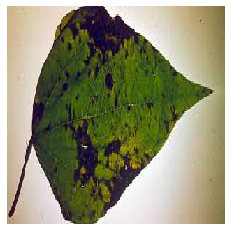

53.789226
58.733031
[[1. 0. 0.]]
Angular Leaf Spot
Time to predict image: 4.943804999999998 


In [0]:
# load_model_sample.py
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import time


def load_image(img_path, show=True):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    model = load_model("/content/Models/inception_frozen.h5")

    # image path
    img_path = '/content/Models/index.jpeg'  
    #img_path = '/media/data/dogscats/test1/19.jpg'   

    # load a single image
    new_image = load_image(img_path)

    # check prediction
    labels=['Angular Leaf Spot','Bean Rust','Healthy']
    start = time.clock()
    print(start)
    pred = model.predict(new_image)
    end = time.clock()
    print(end)
    print(pred)
    print(labels[np.argmax(pred[0])])
    print("Time to predict image: {} ".format((end-start)/len(new_image))) 

In [0]:
import numpy as np
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.base import BaseEstimator

class KerasBatchClassifier(KerasClassifier, BaseEstimator):
    def __init__(self, model, **kwargs):
        super().__init__(model)
        self.fit_kwargs = kwargs
        self._estimator_type = 'classifier'

    def fit(self, *args, **kwargs):
        # taken from keras.wrappers.scikit_learn.KerasClassifier.fit
        self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
        
        self.classes_ = np.array(range(len(self.fit_kwargs['traingen'].class_indices)))
        self.__history = self.model.fit_generator(
            self.fit_kwargs.pop('train_generator'), 
            **self.fit_kwargs
        )


In [0]:
traingen.class_indices

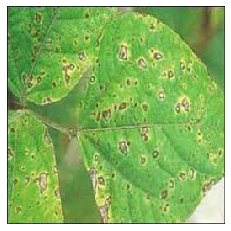

[[1.0000000e+00 1.3771674e-14 1.4563075e-15]]


In [0]:
import cv2
model = load_model('/content/Models/inception_frozen.h5')

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = load_image('/content/y.jpeg')

# classes =model.predict_generator(img, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
classes = model.predict(img)

print(classes)

In [0]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve,confusion_matrix 
from sklearn.metrics import classification_report
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from inspect import signature

In [0]:
acc = model.evaluate_generator(traingen, steps=2, verbose=1)
print(acc)

2/2 [==============================] - 4s 2s/step - loss: 0.0000e+00 - acc: 1.0000
[0.0, 1.0]


In [0]:
pred_train= model.predict(traingen)
scores = model.evaluate(traingen,verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(validationgen)
scores2 = model.evaluate(validationgen,verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    


Accuracy on training data: 0.9980769157409668% 
 Error on training data: 0.0019230842590332031
Accuracy on test data: 0.96138995885849% 
 Error on test data: 0.03861004114151001


In [0]:
from tensorflow.keras import backend as K
import tensorflow as tf
import os
# This line must be executed before loading Keras model.
K.set_learning_phase(0)
from tensorflow.keras.models import load_model
model = load_model('/content/Final/Original.h5')
print(model.outputs)
# [<tf.Tensor 'dense_2/Softmax:0' shape=(?, 10) dtype=float32>]
print(model.inputs)
# [<tf.Tensor 'conv2d_1_input:0' shape=(?, 28, 28, 1) dtype=float32>]

def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    from tensorflow.python.framework.graph_util import convert_variables_to_constants
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        # Graph -> GraphDef ProtoBuf
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = convert_variables_to_constants(session, input_graph_def,
                                                      output_names, freeze_var_names)
        return frozen_graph


frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs])

[<tf.Tensor 'dense_8_1/Softmax:0' shape=(?, 3) dtype=float32>]
[<tf.Tensor 'Mul_7:0' shape=(?, 224, 224, 3) dtype=float32>]
INFO:tensorflow:Froze 4654 variables.
INFO:tensorflow:Converted 4654 variables to const ops.


In [0]:
from tensorflow.keras import backend as K
import tensorflow as tf
#TensorFlow session
sess = tf.Session()
# from tensorflow.contrib import lite
import os
# This line must be executed before loading Keras model.
K.set_learning_phase(0)
from tensorflow.keras.models import load_model
model ='/content/Models/inception_frozen.h5'

# print(model.outputs)
# print(model.inputs)

In [0]:

def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = tf.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph

In [0]:
tf.train.write_graph(frozen_graph, "/content/Final", "original.pb", as_text=False)

'/content/Final/original.pb'

In [0]:
import tensorflow as tf

#from google.protobuf import text_format
from tensorflow.python.platform import gfile

def converter(filename): 
  with gfile.FastGFile(filename,'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')
    tf.train.write_graph(graph_def, 'pbtxt/', 'protobuf.pbtxt', as_text=True)
    print(graph_def)
  return


#converter('ssd_mobilenet_v1_coco_2017_11_17/frozen_inference_graph.pb')  # here you can write the name of the file to be converted
# and then a new file will be made in pbtxt directory.

In [0]:
converter('/content/Models/inception_frozen.pb')

Instructions for updating:
Use tf.gfile.GFile.


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
def print_graph_nodes(filename):
    import tensorflow as tf
    g = tf.GraphDef()
    g.ParseFromString(open(filename, 'rb').read())
    print()
    print(filename)
    print("=======================INPUT=========================")
    print([n for n in g.node if n.name.find('input') != -1])
    print("=======================OUTPUT========================")
    print([n for n in g.node if n.name.find('output') != -1])
    print("===================KERAS_LEARNING=====================")
    print([n for n in g.node if n.name.find('keras_learning_phase') != -1])
    print("======================================================")
    print()

In [0]:
print_graph_nodes('/content/Models/model_.pb')


/content/Models/model_.pb
=======================INPUT=========================
[name: "input_1_2"
op: "Placeholder"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "shape"
  value {
    shape {
      dim {
        size: -1
      }
      dim {
        size: -1
      }
      dim {
        size: -1
      }
      dim {
        size: 3
      }
    }
  }
}
]
=======================OUTPUT========================
[name: "output_node0"
op: "Identity"
input: "strided_slice"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}
, name: "output_node1"
op: "Identity"
input: "strided_slice_1"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}
, name: "output_node2"
op: "Identity"
input: "strided_slice_2"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}
]
===================KERAS_LEARNING=====================
[]



In [0]:
from tensorflow.python.framework import graph_util
from tensorflow.python.framework import graph_io
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K
import os.path as osp

model = load_model('/content/Models/inception_frozen.h5')
nb_classes = 3 # The number of output nodes in the model
prefix_output_node_names_of_final_network = 'output_node'

K.set_learning_phase(0)

pred = [None]*nb_classes
pred_node_names = [None]*nb_classes
for i in range(nb_classes):
    pred_node_names[i] = prefix_output_node_names_of_final_network+str(i)
    pred[i] = tf.identity(model.output[i], name=pred_node_names[i])
print('output nodes names are: ', pred_node_names)

sess = K.get_session()
output_fld = 'tensorflow_model/'
if not os.path.isdir(output_fld):
    os.mkdir(output_fld)
output_graph_name ='/content/Models/model_.pb'
output_graph_suffix = '_inference'

constant_graph = graph_util.convert_variables_to_constants(sess, sess.graph.as_graph_def(), pred_node_names)
graph_io.write_graph(constant_graph, output_fld, output_graph_name, as_text=False)
print('saved the constant graph (ready for inference) at: ', osp.join(output_fld, output_graph_name))

output nodes names are:  ['output_node0', 'output_node1', 'output_node2']
INFO:tensorflow:Froze 382 variables.
INFO:tensorflow:Converted 382 variables to const ops.
saved the constant graph (ready for inference) at:  /content/Models/model_.pb


In [0]:
from google.colab import files
files.download('/content/pbtxt/protobuf.pbtxt') 

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 43752, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
import tensorflow as tf
from tensorflow.core.framework import graph_pb2 as gpb
from google.protobuf import text_format as pbtf

gdef = gpb.GraphDef()

with open('/content/pbtxt/protobuf.pbtxt', 'r') as fh:
    graph_str = fh.read()

pbtf.Parse(graph_str, gdef)

tf.import_graph_def(gdef)

In [0]:
model = tf.keras.models.load_model(os.path.join('/content/Models/inception_frozen.h5'))
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [0]:
def get_graph_def_from_file(graph_filepath):
  tf.reset_default_graph()
  with tf.gfile.GFile(graph_filepath, 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    return graph_def

In [0]:
graph_def =get_graph_def_from_file('/content/Models/inception_frozen.pb')
for node in graph_def.node:
  if node.op=='Placeholder':
    print(node)

name: "input_1_2"
op: "Placeholder"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "shape"
  value {
    shape {
      dim {
        size: -1
      }
      dim {
        size: -1
      }
      dim {
        size: -1
      }
      dim {
        size: 3
      }
    }
  }
}



In [0]:
!git add -A

In [0]:
import os
import tensorflow.contrib.tensorrt as trt
import tensorflow as tf


output_names = ['dense_2_4/Softmax']

print("------------- Load frozen graph from disk -------------")
with tf.gfile.GFile('/content/Models/inception_frozen.pb', "rb") as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

------------- Load frozen graph from disk -------------


In [0]:

print("------------- Optimize the model with TensorRT -------------")
trt_graph = trt.create_inference_graph(
    input_graph_def=graph_def,
    outputs=output_names,
    max_batch_size=1,
    max_workspace_size_bytes=1 << 26,
    precision_mode='FP16',
    minimum_segment_size=2
)

------------- Optimize the model with TensorRT -------------
INFO:tensorflow:Linked TensorRT version: (0, 0, 0)
INFO:tensorflow:Loaded TensorRT version: (0, 0, 0)
INFO:tensorflow:Running against TensorRT version 0.0.0


InvalidArgumentError: ignored

In [0]:
print("------------- Write optimized model to the file -------------")
with open(DATA_DIR + MODEL + TRT_SUFFIX + '.pb', 'wb') as f:
    f.write(trt_graph.SerializeToString())

print("------------- DONE! -------------")